<h2> DataDay 2024 </h2>
<h3> Som príliš často na sociálnej sieti, čo hovoria dáta? </h3>
<h4> doc. Mgr. Jozef Kiseľák, PhD. </h4>

Svoje facebookove údaje si môžte stiahnuť na linku: https://www.facebook.com/dyi/?referrer=yfi_settings
Alebo použite súbor your_posts_1.json z GitHubu.


Najprv si načítame knižnice (moduly), ktoré budeme využívať.

Medzi najzákladnejšie patrí knižnica Pandas, ktorá slúži na manipuláciu s dátami a ich analýzu. Na ďalšie operácie s dátovými štruktúrami nám bude slúžiť aj knižnica NumPy.

Ďalšími podstatnými knižnicami, ktoré využijeme sú knižnice Seaborn a Matplotlib, ktoré nám poslúžia na vizualizáciu našich údajov.

<h4> Importy </h4>

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

<h4> Načítanie údajov a ich spracovanie </h4>

Knižnica Pandas obsahuje užitočnú dátovu štruktúru DataFrame, do ktorej si načítame naše údaje.

DataFrame, alebo dátový rámec je štruktúra, ktorá je určená najmä pre tabuľkové údaje a vďaka nej vieme efektívne pracovať aj s veľkými súbormi.

In [77]:
df = pd.read_json('your_posts_1.json')
#event = pd.read_json('event_invitations.json')

Funkcia .head() nám poskytne náhľad do našich údajov. Bez dodatočných argumentov nám vypíše prvých 5 riadkov DataFrame-u. Ak by sme chceli vypísať viac, alebo menej riadkov, stačí požadovaný počet riadkov zadať do zátvoriek.

In [78]:
df.head()
# df.head(3)

,timestamp,data,title,attachments,tags
0,2008-08-03 19:01:32,[{'post': 'je doma'}],Fero Mrkvicka updated her status.,NaN,NaN
1,2008-08-05 20:21:46,"[{'post': 'ako malo staci, aby padali ceresne ...",Fero Mrkvicka updated her status.,NaN,NaN
2,2008-12-02 08:44:41,[],Fero Mrkvicka wrote on Tona's timeline.,NaN,NaN
3,2009-04-12 22:59:28,[{'update_timestamp': 1239577168}],Fero Mrkvicka shared a link.,[{'data': [{'external_context': {'url': 'http:...,NaN
4,2009-08-07 12:08:52,[{'post': '...ta idem dnes na rodnu'}],NaN,NaN,NaN


In [83]:
print(f'Rozmery nášho DataFrame-u (počet riadkov, počet stĺpcov): {df.shape}')

Rozmery nášho DataFrame-u (počet riadkov, počet stĺpcov): (1313, 5)


In [79]:
#Pre jednoduchosť si premenujeme stĺpec s časovou pečiatkou "timestamp" na názov "date".
df.rename(columns={'timestamp': 'date'}, inplace=True)
df

,date,data,title,attachments,tags
0,2008-08-03 19:01:32,[{'post': 'je doma'}],Fero Mrkvicka updated her status.,NaN,NaN
1,2008-08-05 20:21:46,"[{'post': 'ako malo staci, aby padali ceresne ...",Fero Mrkvicka updated her status.,NaN,NaN
2,2008-12-02 08:44:41,[],Fero Mrkvicka wrote on Tona's timeline.,NaN,NaN
3,2009-04-12 22:59:28,[{'update_timestamp': 1239577168}],Fero Mrkvicka shared a link.,[{'data': [{'external_context': {'url': 'http:...,NaN
4,2009-08-07 12:08:52,[{'post': '...ta idem dnes na rodnu'}],NaN,NaN,NaN
...,...,...,...,...,...
1308,2023-02-28 07:44:22,[{'update_timestamp': 1677570262}],Fero Mrkvicka shared a post.,[],NaN
1309,2023-02-28 14:28:25,[{'update_timestamp': 1677594505}],Fero Mrkvicka shared a post.,[],NaN
1310,2023-02-28 23:00:56,[],NaN,NaN,NaN
1311,2023-03-04 18:38:51,[{'update_timestamp': 1677955131}],Fero Mrkvicka shared a post.,[],NaN


In [84]:
#Niektoré zo stĺpcov v DataFrame nebudeme potrebovať, čiže ich môžme "zahodiť".
df = df.drop(['attachments', 'title', 'tags'], axis=1)
df

,date,data
0,2008-08-03 19:01:32,[{'post': 'je doma'}]
1,2008-08-05 20:21:46,"[{'post': 'ako malo staci, aby padali ceresne ..."
2,2008-12-02 08:44:41,[]
3,2009-04-12 22:59:28,[{'update_timestamp': 1239577168}]
4,2009-08-07 12:08:52,[{'post': '...ta idem dnes na rodnu'}]
...,...,...
1308,2023-02-28 07:44:22,[{'update_timestamp': 1677570262}]
1309,2023-02-28 14:28:25,[{'update_timestamp': 1677594505}]
1310,2023-02-28 23:00:56,[]
1311,2023-03-04 18:38:51,[{'update_timestamp': 1677955131}]


In [85]:
#Overenie, či má dátum správny formát YYYY-MM-DD HH:MM:SS.
df['date'] = pd.to_datetime(df['date'])
df

,date,data
0,2008-08-03 19:01:32,[{'post': 'je doma'}]
1,2008-08-05 20:21:46,"[{'post': 'ako malo staci, aby padali ceresne ..."
2,2008-12-02 08:44:41,[]
3,2009-04-12 22:59:28,[{'update_timestamp': 1239577168}]
4,2009-08-07 12:08:52,[{'post': '...ta idem dnes na rodnu'}]
...,...,...
1308,2023-02-28 07:44:22,[{'update_timestamp': 1677570262}]
1309,2023-02-28 14:28:25,[{'update_timestamp': 1677594505}]
1310,2023-02-28 23:00:56,[]
1311,2023-03-04 18:38:51,[{'update_timestamp': 1677955131}]


In [86]:
print(f'Rozmery nášho DataFrame-u (počet riadkov, počet stĺpcov), po vymazaní stĺpcov: {df.shape}')

Rozmery nášho DataFrame-u (počet riadkov, počet stĺpcov), po vymazaní stĺpcov: (1313, 2)


Podobne ako u funkcie .head(), ktorá nám vypísala počiatočné riadky, nám funkcia .tail() vypíše koncové riadky.

In [87]:
df.tail()
# df.tail(3)

,date,data
1308,2023-02-28 07:44:22,[{'update_timestamp': 1677570262}]
1309,2023-02-28 14:28:25,[{'update_timestamp': 1677594505}]
1310,2023-02-28 23:00:56,[]
1311,2023-03-04 18:38:51,[{'update_timestamp': 1677955131}]
1312,2023-03-12 08:27:57,[{'update_timestamp': 1678609677}]


In [88]:
#Nastavíme si v DataFrame ako hlavný index dátum.
df.set_index('date',inplace=True)

V nasledujúcej bunke sa naše údaje - teda interakcie na sociálnej sieti, rozdelia do skupiniek po mesiacoch v jednotlivých rokoch, v ktorých sa odohrali. Stĺpec "date" teraz nebude obsahovať informácie vo formáte YYYY-MM-DD HH:MM:SS, ale už len YYYY-MM-01, keďže sme nerozlišovali deň, v ktorých boli dané posty vytvorené.

Funkcia .size() nám uloží do stĺpca "data" počet príspevkov, ktoré boli v danom mesiaci daného roka vytvorené.

In [29]:
post_counts=df.resample('MS').size()  #For 'MS' the dates of the groups are always the first of the month, for 'M' the last day.
#post_means=post_counts.resample('YS').mean(numeric_only=True)

Ukážka novozískaných údajov:

In [89]:
post_counts

date
2008-08-01     2
2008-09-01     0
2008-10-01     0
2008-11-01     0
2008-12-01     1
              ..
2022-11-01    25
2022-12-01    10
2023-01-01    12
2023-02-01    22
2023-03-01     2
Freq: MS, Length: 176, dtype: int64

V ďalšom kroku si vyberieme nejaký počiatočný a koncový dátum, pre ktoré si z DataFrame-u o počte príspevkov za jednotlivé mesiace zoberieme podmnožinu údajov pre vizualizáciu.

In [90]:
start_date = '2021-11-15'
end_date   = '2022-11-18'
#Nasledujúci príkaz šikovne zoberie len tie riadky, ktoré budú v nami zadanom rozsahu dátumov.
df2 = df.query('date >= @start_date and date <= @end_date')
df2

,data
date,
2021-11-17 07:31:11,[{'update_timestamp': 1637134271}]
2021-11-18 14:35:57,[{'update_timestamp': 1637246157}]
2021-11-19 11:43:59,[{'update_timestamp': 1637322239}]
2021-11-23 18:52:55,[{'update_timestamp': 1637693575}]
2021-11-25 11:02:32,[{'post': 'Bandisko!!!! Vsetko najlepsie praje...
...,...
2022-11-10 10:36:09,[{'update_timestamp': 1668076569}]
2022-11-11 09:38:06,[{'update_timestamp': 1668159486}]
2022-11-14 19:43:00,[{'update_timestamp': 1668454980}]


<h4> Vizualizácia </h4>

In [92]:
#Nastavenie predvolenej veľkosti grafu a veľkosti písma.
sns.set(rc={'figure.figsize':(10,5)})
sns.set(font_scale=1)

In [93]:
#Na os x budeme chcieť jednotlivé dátumy - vložínme si teda tento stĺpec do premennej x_labels.
x_labels = post_counts.index
x_labels

DatetimeIndex(['2008-08-01', '2008-09-01', '2008-10-01', '2008-11-01',
               '2008-12-01', '2009-01-01', '2009-02-01', '2009-03-01',
               '2009-04-01', '2009-05-01',
               ...
               '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01',
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01'],
              dtype='datetime64[ns]', name='date', length=176, freq='MS')

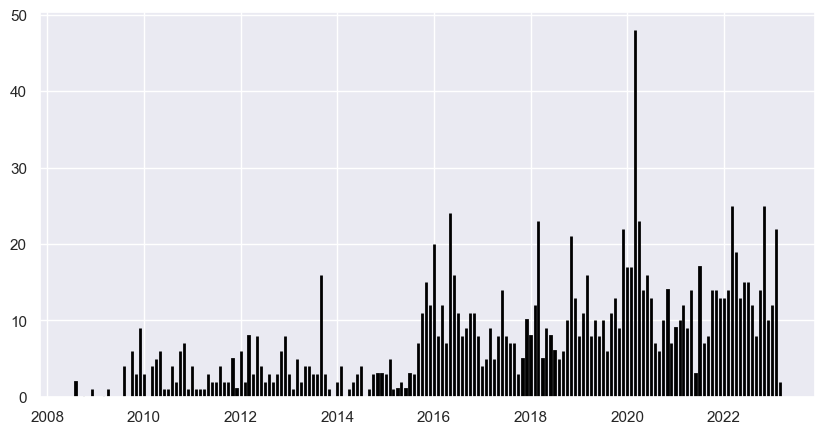

In [95]:
fig, ax = plt.subplots()
ax.bar(x_labels,post_counts,color = "black",edgecolor = "black", linewidth = 2)
plt.show()

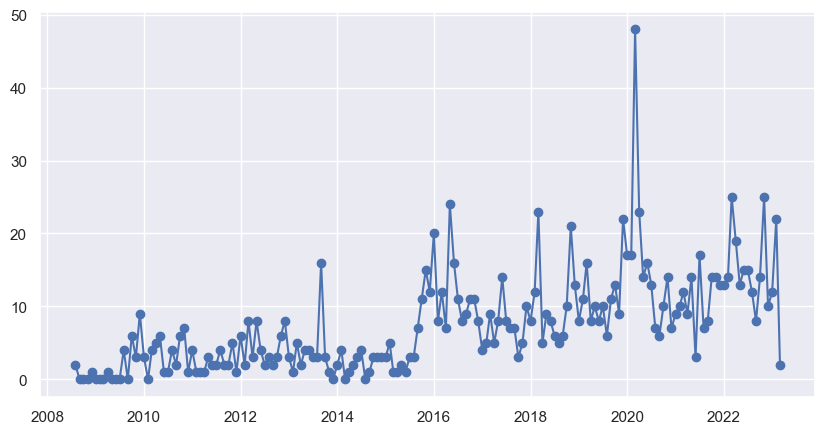

In [96]:
plt.plot(post_counts, marker='o')
plt.show()

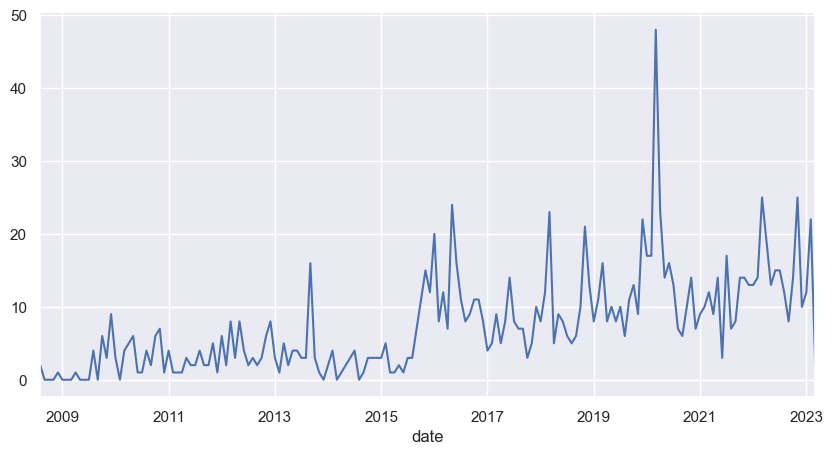

In [97]:
ax = post_counts.plot(x='Date', y='Number of posts')
plt.show()

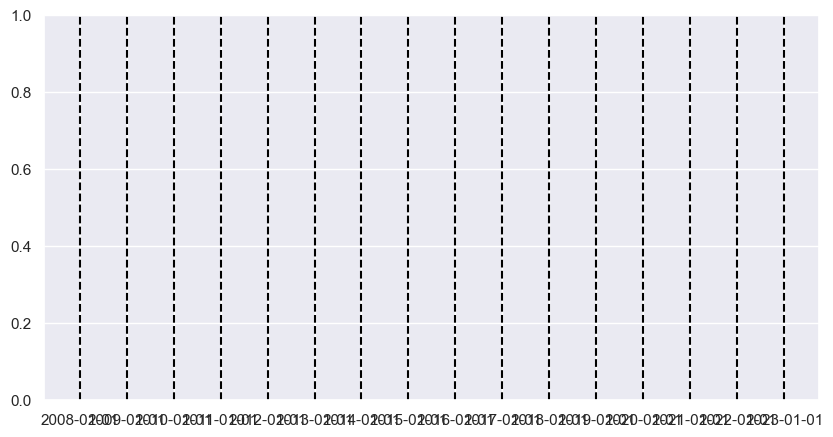

In [98]:
xcoords = ['2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01','2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')
# plt.scatter(x_labels, post_counts)
# post_freq=post_counts/np.sum(post_counts)  #frekvencie
# plt.plot(post_freq, marker='o')

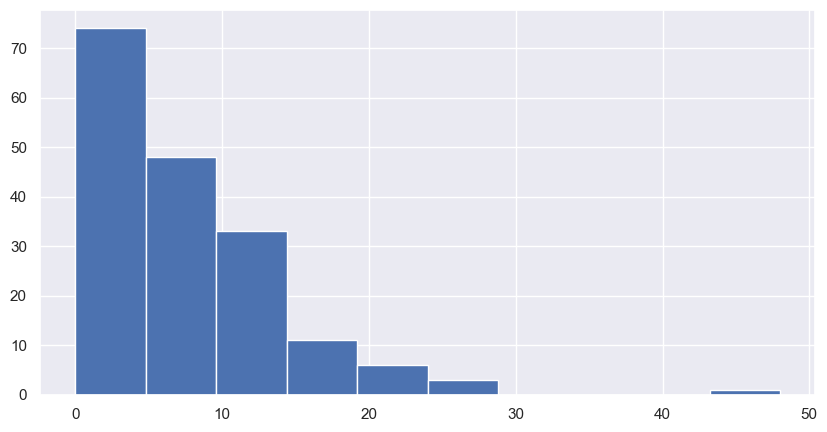

In [99]:
post_counts.hist()
plt.show()

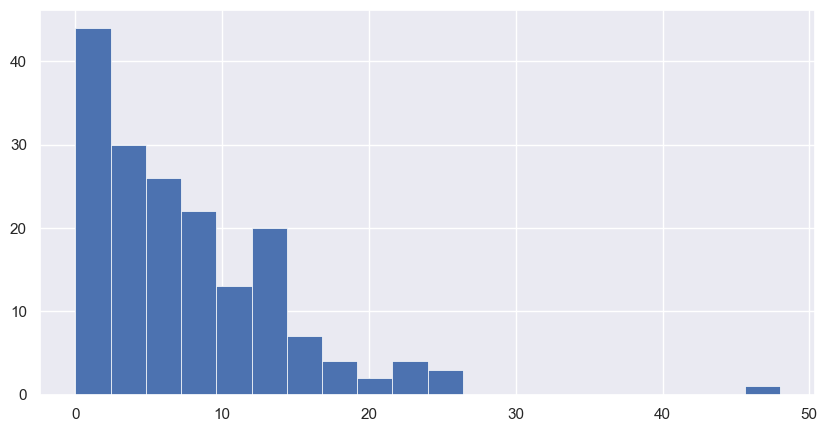

In [100]:
plt.hist(post_counts, bins=20, linewidth=0.5, edgecolor="white")
plt.show()

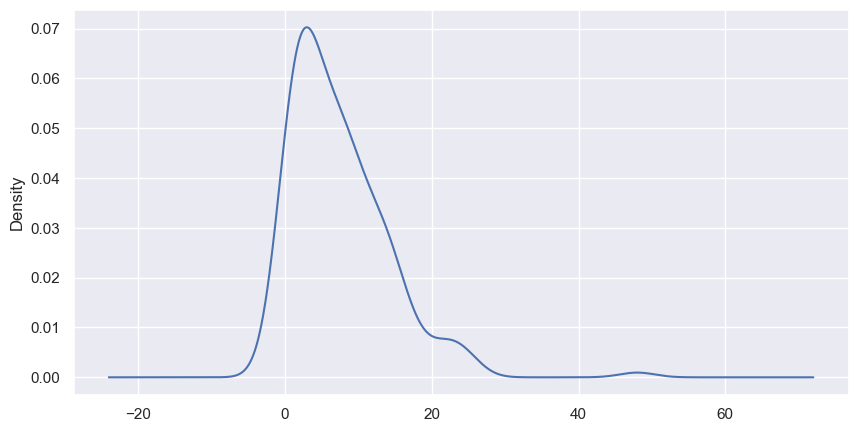

In [101]:
post_counts.plot(kind='kde')
plt.show()

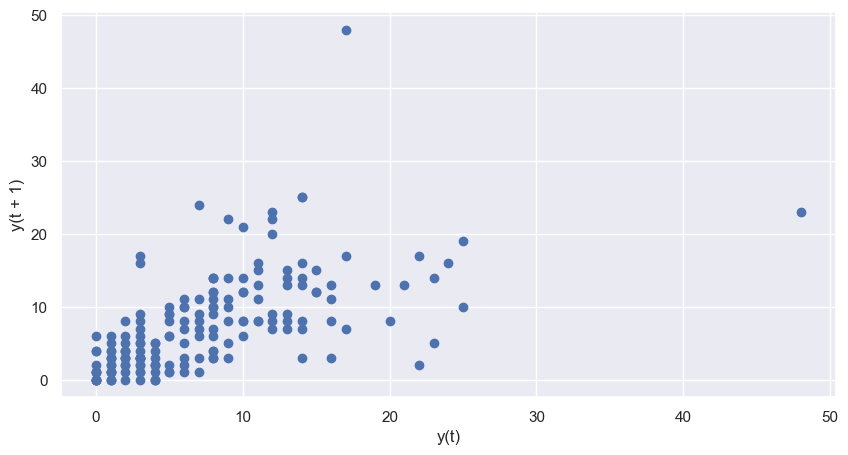

In [102]:
#More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship.
#A ball in the middle or a spread across the plot suggests a weak or no relationship.
pd.plotting.lag_plot(post_counts, lag=1)
plt.show()

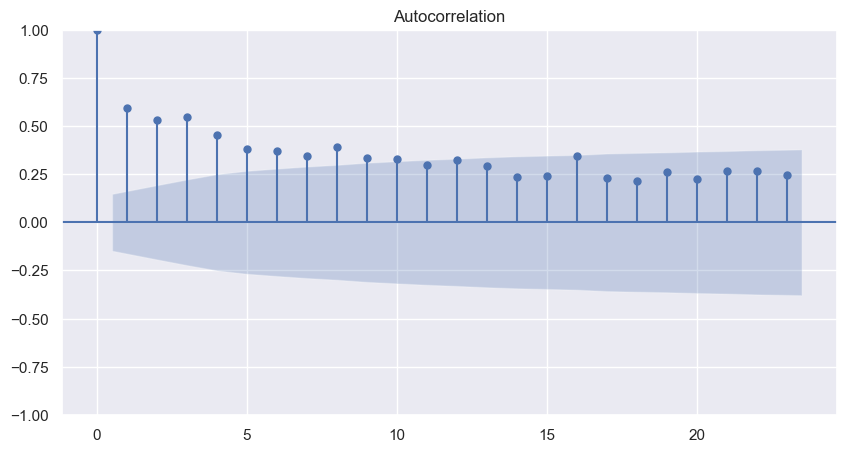

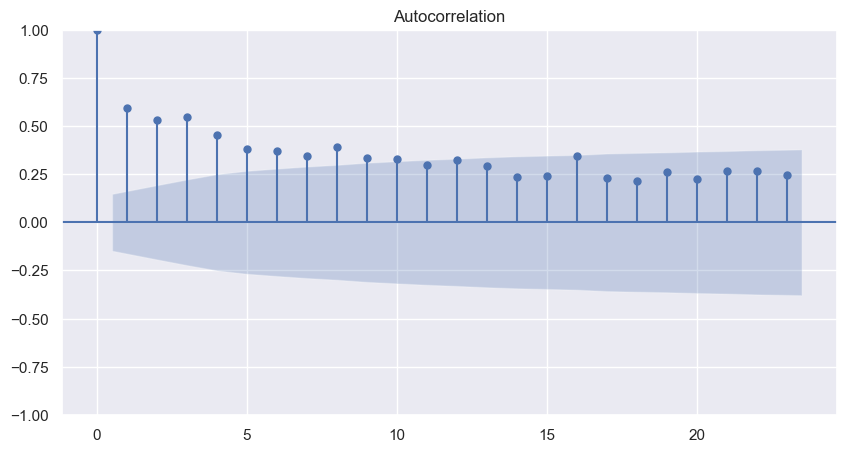

In [103]:
plot_acf(post_counts)

In [104]:
split = round(len(post_counts) / 2)
X1, X2 = post_counts[0:split], post_counts[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=3.090909, mean2=11.829545
variance1=9.118077, variance2=42.924634


In [105]:
result = adfuller(post_counts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('used lag: %f' % result[2])
print('num. of obs.: %f' % result[3])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

print('The maximized information criterion if autolag is not None: %f' % result[5])

ADF Statistic: -3.246053
p-value: 0.017469
used lag: 2.000000
num. of obs.: 173.000000
Critical Values:
	1%: -3.469
	5%: -2.878
	10%: -2.576
The maximized information criterion if autolag is not None: 991.766312


<h2> Zdroje: </h2>

Pôvodný Jupyter notebook FCBOOK.ipynb: https://colab.research.google.com/drive/1b355atUOd8xm6QbwfP6jkVQAmJoewIhZ